In [58]:
pip install seaborn

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
sns.set_style('whitegrid')

df=pd.read_csv('/content/imdb_sampled.csv')
df.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,8850,A Bay of Blood (1971)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)


In [60]:
# Widget function
def recommend(title):
    output.clear_output()
    recommendations = get_recommendations(title)
    if recommendations is None:
        with output:
            print("No recommendations found for the given title.")
    else:
        with output:
            display(recommendations)
# Title input widget
title_input = widgets.Text(value='',placeholder='Enter a title',description='Title:',disabled=False)
# Button widget
button = widgets.Button(description="Get Recommendations")

output = widgets.Output()
def on_button_clicked(b):
    recommend(title_input.value)
button.on_click(on_button_clicked)

# Display widgets
display(title_input, button, output)

Text(value='', description='Title:', placeholder='Enter a title')

Button(description='Get Recommendations', style=ButtonStyle())

Output()

In [61]:
df['startYear'] = [0 if year == '\\N' else int(year) for year in df['startYear']]
df['endYear'] = [year if year == '\\N' else int(year) for year in df['endYear']]
df = df[df['startYear']>=1980]
df.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)
5,tt0268978,movie,A Beautiful Mind,A Beautiful Mind,0,2001,\N,Biography Drama,8.2,822275,A Beautiful Mind (2001)


In [62]:
df['titleType'].value_counts()


movie           8792
tvSeries        2555
tvMiniSeries     399
tvMovie          327
video            189
tvSpecial         95
Name: titleType, dtype: int64

In [63]:
def helper_func(title_type):
    if title_type in ['short','tvShort','tvEpisode','videoGame']:
        return np.nan
    else:
        return title_type


In [64]:
df['titleType'] =  df['titleType'].apply(helper_func)

<ipython-input-64-b70cb5665fcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['titleType'] =  df['titleType'].apply(helper_func)


In [65]:
df = df[df['titleType'].notna()]

In [66]:
df['genres'] = df['genres'].apply(lambda x: np.nan if x == '\\N' else x)

In [67]:
df = df[df['genres'].notna()]

In [68]:
df.reset_index(drop=True,inplace=True)
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)
4,tt0268978,movie,A Beautiful Mind,A Beautiful Mind,0,2001,\N,Biography Drama,8.2,822275,A Beautiful Mind (2001)


In [69]:
df.to_csv('imdb.csv',index=False)

In [70]:
imdb = pd.read_csv('imdb.csv')
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)
4,tt0268978,movie,A Beautiful Mind,A Beautiful Mind,0,2001,\N,Biography Drama,8.2,822275,A Beautiful Mind (2001)


<ipython-input-71-f18eae1515dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imdb['averageRating'])


<Axes: xlabel='averageRating', ylabel='Density'>

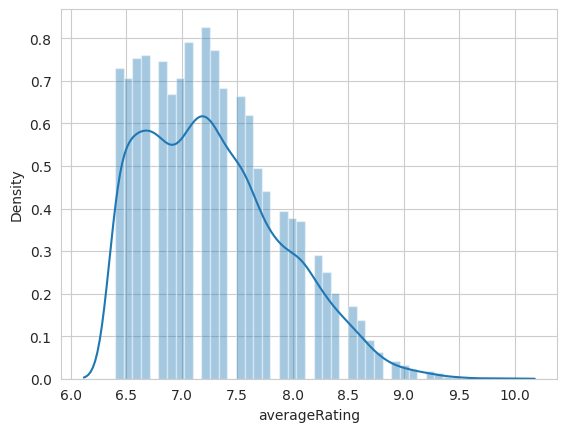

In [71]:
sns.distplot(imdb['averageRating'])

<ipython-input-72-e9a0c76e7c37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imdb['numVotes'][imdb['numVotes']<=3124],bins=30)


<Axes: xlabel='numVotes', ylabel='Density'>

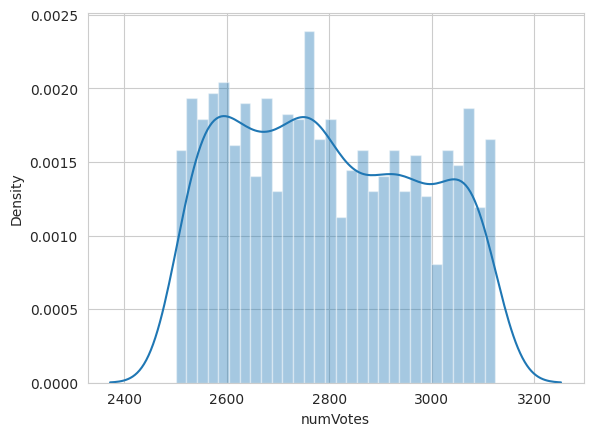

In [72]:
sns.distplot(imdb['numVotes'][imdb['numVotes']<=3124],bins=30)

In [73]:
imdb['numVotes'].describe(percentiles=[0.25,0.75,0.95]).round(2)

count      12357.00
mean       51739.28
std       128746.42
min         2500.00
25%         4355.00
50%         9628.00
75%        35610.00
95%       250479.80
max      2260919.00
Name: numVotes, dtype: float64

In [74]:
imdb.corr()

<ipython-input-74-aa5abc8f1fd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  imdb.corr()


,isAdult,startYear,averageRating,numVotes
isAdult,1.000000,0.000930,0.004280,-0.004744
startYear,0.000930,1.000000,0.031443,-0.011277
averageRating,0.004280,0.031443,1.000000,0.156857
numVotes,-0.004744,-0.011277,0.156857,1.000000


In [75]:
imdb = pd.read_csv('imdb.csv')

In [76]:
imdb = imdb[(imdb['numVotes']>=2500) & (imdb['averageRating']>=6.4)]

In [77]:
imdb.reset_index(drop=True,inplace=True)
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2833,A Bag of Hammers (2011)
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Drama War,7.3,4458,A Bag of Marbles (2017)
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3465,A Band Called Death (2012)
3,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,46668,A Beautiful Day in the Neighborhood (2019)
4,tt0268978,movie,A Beautiful Mind,A Beautiful Mind,0,2001,\N,Biography Drama,8.2,822275,A Beautiful Mind (2001)


In [78]:
imdb['startYear'] = [year if year == '\\N' else int(year) for year in imdb['startYear']]

In [79]:
imdb['endYear'] = [year if year == '\\N' else int(year) for year in imdb['endYear']]

In [80]:
imdb['primaryTitle'] = imdb['primaryTitle'].apply(lambda x: x.strip("'*"))
bool_mask = imdb['primaryTitle'].str[0].str.isalpha()
alpha_list = imdb['primaryTitle'][bool_mask].sort_values()
non_alpha_list = imdb['primaryTitle'][~bool_mask].sort_values()
imdb = imdb.iloc[alpha_list.append(non_alpha_list).index]

<ipython-input-80-5a94e716e8b8>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imdb = imdb.iloc[alpha_list.append(non_alpha_list).index]


In [81]:
imdb.index = imdb['tconst']

In [82]:
tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']

In [83]:
movie_df = imdb[imdb['titleType'].apply(lambda x: x not in tv_shows)]

In [84]:
tv_shows_df = imdb[imdb['titleType'].apply(lambda x: x in tv_shows)]

In [85]:
tv_shows_dict = {k: f"{t} ({s})" if s == e else f"{t} ({s}– )" if e =='\\N' else f"{t} ({s}–{e})" for k,t,s,e in tv_shows_df[['primaryTitle','startYear','endYear']].itertuples()}

In [86]:
movie_dict = {k: f"{t} ({s})"  for k,t,s,e in movie_df[['primaryTitle','startYear','endYear']].itertuples()}

In [87]:
sortedTitle = pd.Series(tv_shows_dict).append(pd.Series(movie_dict))

<ipython-input-87-4bdb076026c6>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortedTitle = pd.Series(tv_shows_dict).append(pd.Series(movie_dict))


In [88]:
imdb.reset_index(drop=True, inplace=True)

In [89]:
sortedTitle = pd.DataFrame(sortedTitle).reset_index().rename({'index':'tconst',0:'sortedTitle'},axis=1)
sortedTitle.head()

,tconst,sortedTitle
0,tt0101049,A Bit of Fry and Laurie (1987–1995)
1,tt0385567,A Boyfriend for Christmas (2004– )
2,tt2415112,A Bride for Christmas (2012– )
3,tt0216621,A Christmas Carol (1999– )
4,tt7686464,A Christmas Carol (2019)


In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
cv = CountVectorizer(dtype=np.uint8)

In [92]:
dtm = cv.fit_transform(imdb['genres']).toarray()

In [93]:
dtm.shape

(12357, 30)

In [94]:
new_matrix = np.concatenate((dtm, np.array(imdb['averageRating']).reshape(-1,1)),axis=1)

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
MMS = MinMaxScaler()

In [97]:
numVotes = np.array(imdb['numVotes'])

In [98]:
numVotes = numVotes.reshape(-1,1)

In [99]:
numVotes = MMS.fit_transform(numVotes)

In [100]:
new_matrix = np.concatenate((new_matrix,numVotes),axis=1)

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
similarities = cosine_similarity(new_matrix,dense_output=False)

In [103]:
similarities.shape

(12357, 12357)

In [104]:
def build_recommendations(title):
  try:
    title = title.lower()
    tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']
    sorted_title_found = True in imdb['sortedTitle'].apply(lambda t: t.lower() == title)
    try:
      idx = imdb[imdb['sortedTitle'].apply(lambda x: x.lower())==title].index[0]
    except:
      idx = imdb[imdb['primaryTitle'].apply(lambda x: x.lower())==title].index[0]
    recommendations = imdb['sortedTitle'].iloc[similarities[idx].argsort()[::-1]][0:500] # slicing only 500 values for improved performance (process explained below)
    if imdb.iloc[idx]['titleType'] != 'movie':
      tv_recommendations = {rec:[imdb['tconst'].iloc[rec],imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] in tv_shows}
      return pd.DataFrame(tv_recommendations).transpose().iloc[1:11]
    else:
      movie_recommendations = {rec:[imdb['tconst'].iloc[rec], imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] == 'movie'}
      return pd.DataFrame(movie_recommendations).transpose().iloc[1:11]
  except:
    return None



In [105]:
def get_recommendations(title):
  recommendations = build_recommendations(title)
  if recommendations is None:
    return recommendations
  else:
    recommendations.rename(columns={0:'tconst',1:'title'},inplace=True)
    recommendations.reset_index(drop=True, inplace=True)
    recommendations['urls'] = [f'https://www.imdb.com/title/{title_id}/' for title_id in recommendations['tconst']]
    return recommendations.drop('tconst',axis=1)

In [106]:
%timeit get_recommendations('IT')

128 ms ± 35.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
print(f"Speed of Prediction: {((854-36.6)/854)*100:.2f}% increase")

Speed of Prediction: 95.71% increase


In [108]:
get_recommendations('Interstellar')

,title,urls
0,The Martian (2015),https://www.imdb.com/title/tt3659388/
1,Battle Royale (2000),https://www.imdb.com/title/tt0266308/
2,Brazil (1985),https://www.imdb.com/title/tt0088846/
3,A.I. Artificial Intelligence (2001),https://www.imdb.com/title/tt0212720/
4,Frankenstein (2011),https://www.imdb.com/title/tt1795369/
5,Melancholia (2011),https://www.imdb.com/title/tt1527186/
6,Dead Man's Letters (1986),https://www.imdb.com/title/tt0091759/
7,1984 (1984),https://www.imdb.com/title/tt0087803/
8,Transit (2018),https://www.imdb.com/title/tt6675244/
9,Daft Punk's Electroma (2006),https://www.imdb.com/title/tt0800022/
